# Learning Points & Summary:

* use HTML Markdown in Notebooks, such as section headings `#` and how to embed images with the `<img>` tag.

* combine the `.groupby()` and `.count()` functions to aggregate data

* use the `.value_counts()` function

* slice DataFrames using the square bracket notation e.g., `df[:-2]` or `df[:10]`

* use the `.agg()` function to run an operation on a particular column

* `.rename()` columns of DataFrames

* create a **line chart** with two separate axes to visualise data that have different scales.

* create a **scatter plot** in Matplotlib

* work with tables in a **relational database** by using primary and foreign keys

* `.merge()` DataFrames along a particular column

* create a **bar chart** with Matplotlib


# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [185]:
import pandas as pd

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [186]:
# Read the colors.csv file from the data folder:
colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [187]:
# Find the total number of unique colours
colors['name'].nunique()

135

In [188]:
colors.groupby('rgb').count()

,id,name,is_trans
rgb,,,
000000,3,3,3
0020A0,1,1,1
0033B2,1,1,1
0055BF,1,1,1
008F9B,1,1,1
...,...,...,...
FECCCF,1,1,1
FF800D,1,1,1
FFA70B,1,1,1


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [189]:
print("Opaque colours: ", colors.loc[colors['is_trans'] == 'f'].id.count())
print("Transparent colours: ", colors.loc[colors['is_trans'] == 't'].id.count())

Opaque colours:  107
Transparent colours:  28


In [190]:
print("Opaque colours: ", colors.query('is_trans == "f"').id.count())
print("Transparent colours: ", colors.query('is_trans == "t"').id.count())

Opaque colours:  107
Transparent colours:  28


In [191]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [192]:
# A very quick way of finding the number of members of each category.
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### **Understanding LEGO Themes vs. LEGO Sets**



Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [193]:
sets = pd.read_csv('data/sets.csv')

In [194]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [195]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [196]:
print("Year: ", sets.loc[sets.year.idxmin()]['year'])
print("Set name: ", sets.loc[sets.year.idxmin()]['name'])

# Or human-have-to-read way:
sets.sort_values('year').head()

# Or select the min value in the year field:
print(f"First LEGO sets year released: {sets['year'].min()}")
print(f"First LEGO sets name: { sets['name'][sets['year'].idxmin()] }")

Year:  1949
Set name:  Extra-Large Gift Set (ABB)
First LEGO sets year released: 1949
First LEGO sets name: Extra-Large Gift Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [197]:
# The query way: sets.query('year=="1949"').count()
sets[sets['year'] == 1949].count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [198]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [199]:
sets.groupby('year').set_num.count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

In [200]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [201]:
# Import statement:
import matplotlib.pyplot as plt

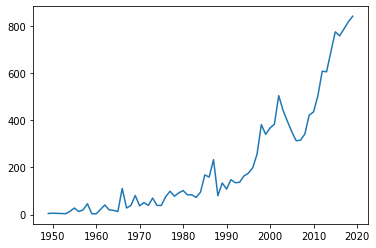

In [202]:
# Plot number of LEGO sets released:
# plt.plot(sets_by_year['set_num'][:-2])
plt.plot(sets_by_year.set_num[:-2])

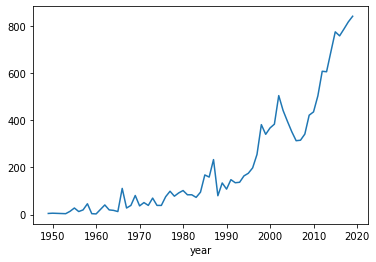

In [203]:
sets_by_year.set_num[:-2].plot()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [204]:
sets.sort_values('year').groupby('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
15553,PENGUIN-1,Penguin,2020,621,24
9745,70427-1,Welcome to the Hidden Side,2020,676,189
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


In [205]:
# The .agg() method takes a dictionary as an argument. 
# In this dictionary, we specify which operation we'd like to apply to each column. 
# In our case, we just want to calculate the number of unique entries in the theme_id column 
# by using our old friend, the .nunique() method.
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [206]:
themes_by_year.rename(columns= {'theme_id':'nr_themes'}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

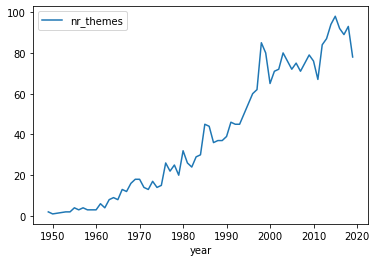

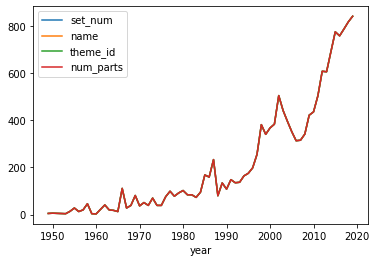

In [207]:
themes_by_year[:-2].plot()
sets_by_year[:-2].plot()

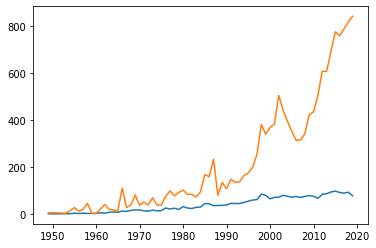

In [208]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

### Line Charts with Two Seperate Axes

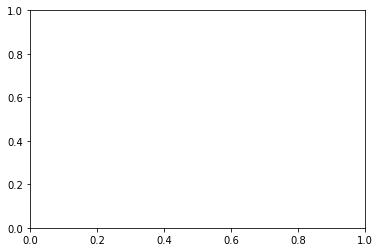

In [209]:
ax1 = plt.gca() # get the axis

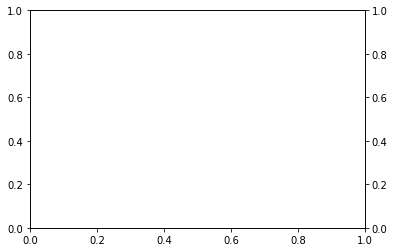

In [210]:
ax1 = plt.gca() # get the axis
ax2 = plt.twinx() # create another axis that shares the same x-axis

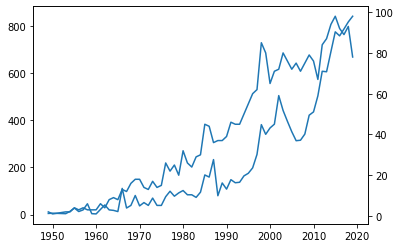

In [211]:
ax1 = plt.gca() # get the axis
ax2 = plt.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year.set_num[:-2])
ax2.plot(themes_by_year.nr_themes[:-2])

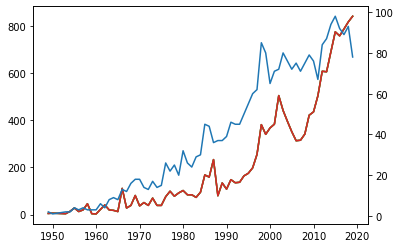

In [212]:
ax1 = plt.gca() # get the axis
ax2 = plt.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year[:-2])
ax2.plot(themes_by_year[:-2])

Text(0, 0.5, 'Number of Themes')

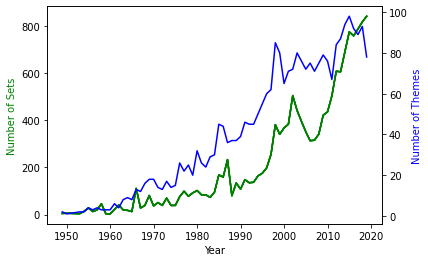

In [213]:
ax1 = plt.gca() # get the axis
ax2 = plt.twinx() # create another axis that shares the same x-axis

# Add styling
ax1.plot(sets_by_year[:-2], color='g')
ax2.plot(themes_by_year[:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='g')
ax2.set_ylabel('Number of Themes', color='b')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

[Documentation: Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)

In [214]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

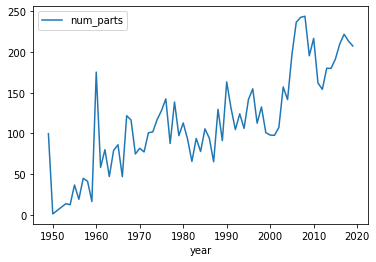

In [215]:
parts_per_set[:-2].plot()

We just need to call the `.scatter()` instead of the `.plot()` method to create the chart. For the **x**-values, we'll use the **index** of the parts_per_set Series (the years) and for the **y**-values, we'll use the **values** of the series (the column name happens to be `num_parts`).

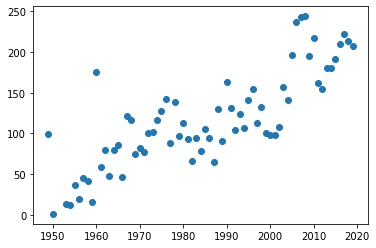

In [216]:
plt.scatter(x=parts_per_set.index[:-2], y=parts_per_set['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Relational Database Schemas: Primary and Foreign Keys**

To count the number of sets per Theme we can use the `.value_counts()` method on our `theme_id` column.

In [217]:
set_theme_count = sets['theme_id'].value_counts()

In [218]:
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
373      1
515      1
531      1
370      1
380      1
Name: theme_id, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [219]:
themes = pd.read_csv('data/themes.csv')

In [220]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [221]:
themes[themes['name']=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [222]:
for id in themes[themes['name']=='Star Wars'].id:
  print(id, ": ", sets[sets.theme_id==id].set_num.count())
  print(id, ": ", sets[sets.theme_id==id].name.nunique(), "unique sets")

18 :  11
18 :  11 unique sets
158 :  753
158 :  594 unique sets
209 :  10
209 :  10 unique sets
261 :  2
261 :  2 unique sets


In [223]:
sets[sets.theme_id==18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


### Merging (i.e., Combining) DataFrames based on a Key

The `.merge()` method works on columns with the same name in both DataFrames.


In [224]:
# To make sure we have a column with the name id, convert the Pandas Series into a Pandas DataFrame.
set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})

In [225]:
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,373,1
567,515,1
568,531,1
569,370,1


**The Pandas .merge() function**

To `.merge()` two DataFrame along a particular **column**, we need to provide our two DataFrames and then the column name on which to merge. This is why we set `on='id'`. Both our `set_theme_count` and our `themes` DataFrames have a column with this name.



In [226]:
merged_df = pd.merge(set_theme_count, themes, on='id')

In [227]:
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,373,1,Vehicle,365.0
567,515,1,Dinosaurs,507.0
568,531,1,eLAB,529.0
569,370,1,Mosaic,365.0


<BarContainer object of 10 artists>

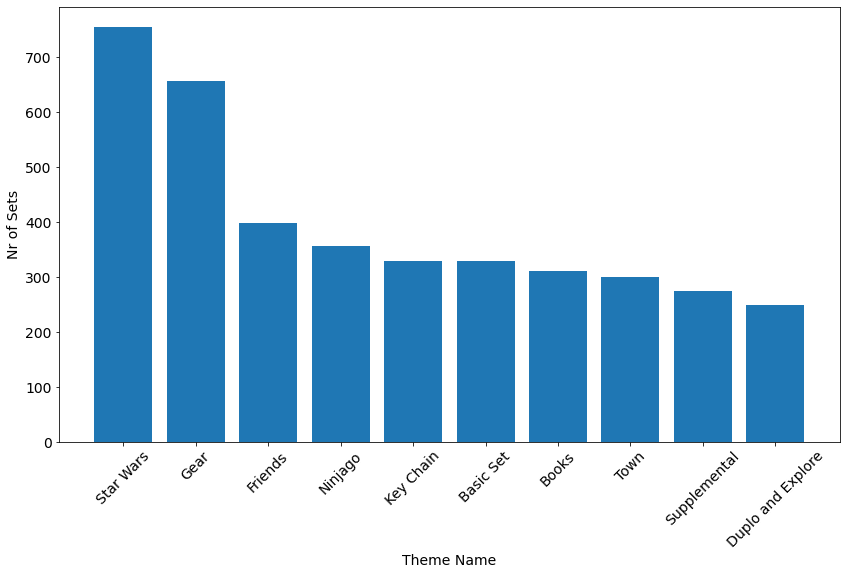

In [235]:
# Add chart styling:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

# Plot the top 10 themes on a chart:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])